In [1]:
pip install pandas xlrd

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd

# Path to the .xls file (Change this to your actual file path)
file_path = "/Users/ssathiyaseelan/Desktop/python/POC_22_07/Document_Search_BOT_excel/upload/supply_chain_test_data.xls"

# Read the .xls file
xls_data = pd.read_excel(file_path, sheet_name=None)  # Read all sheets

# Print formatted output
for sheet_name, sheet_data in xls_data.items():
    print(f"\n--- Sheet: {sheet_name} ---")
    print(sheet_data.to_string(index=False))  # Print without row indices


--- Sheet: supply_chain_test_data ---
Product type   SKU     Price  Availability  Number of products sold  Revenue generated Customer demographics  Stock levels  Lead times  Order quantities  Shipping times Shipping carriers  Shipping costs Supplier name  Location  Lead time  Production volumes  Manufacturing lead time  Manufacturing costs Inspection results  Defect rates Transportation modes  Routes      Costs
    haircare  SKU0 69.808006            55                      802        8661.996792            Non-binary            58           7                96               4         Carrier B        2.956572    Supplier 3    Mumbai         29                 215                       29            46.279879            Pending      0.226410                 Road Route B 187.752075
    skincare  SKU1 14.843523            95                      736        7460.900065                Female            53          30                37               2         Carrier A        9.716575    S

In [3]:
pip install pandas openai xlrd


Note: you may need to restart the kernel to use updated packages.


In [5]:
import pandas as pd
import openai

# Set your OpenAI API key
openai.api_key = "your OpenAI API key"

# Load the .xls file
file_path = "/Users/ssathiyaseelan/Desktop/python/POC_22_07/Document_Search_BOT_excel/upload/supply_chain_test_data.xls"  # Change this to your file path
xls_data = pd.read_excel(file_path, sheet_name=None)  # Read all sheets

# Convert Excel data into a structured text format
context = ""
for sheet_name, sheet_data in xls_data.items():
    context += f"\n--- Sheet: {sheet_name} ---\n"
    context += sheet_data.to_string(index=False)  # Convert dataframe to text

# Function to get response from OpenAI
def get_response(user_query):
    prompt = f"Refer to the following Excel data:\n{context}\n\nQuestion: {user_query}\nAnswer:"

    response = openai.ChatCompletion.create(
        model="gpt-3.5-turbo",
        messages=[{"role": "user", "content": prompt}]
    )

    return response['choices'][0]['message']['content'].strip()

# User interaction loop
while True:
    user_input = input("\nAsk a question (or type 'exit' to quit): ")
    if user_input.lower() == "exit":
        print("Goodbye!")
        break

    answer = get_response(user_input)
    print(f"\nAI Response: {answer}")



Ask a question (or type 'exit' to quit):  skin care product prices range



AI Response: The skincare product prices range from 1.013487 to 99.171329.



Ask a question (or type 'exit' to quit):  total product types



AI Response: There are three total product types: haircare, skincare, and cosmetics.



Ask a question (or type 'exit' to quit):  sgive me a supplier details



AI Response: Here are the details for some suppliers from the supply_chain_test_data Excel sheet:

1. Supplier 1 
   - Location: Mumbai
   - Lead Time: 29
   - Production Volumes: 215
   - Manufacturing Lead Time: 29
   - Manufacturing Costs: 46.279879

2. Supplier 2
   - Location: Chennai
   - Lead Time: 29
   - Production Volumes: 963
   - Manufacturing Lead Time: 23
   - Manufacturing Costs: 47.957602

3. Supplier 3
   - Location: Kolkata
   - Lead Time: 24
   - Production Volumes: 937
   - Manufacturing Lead Time: 18
   - Manufacturing Costs: 35.624741

4. Supplier 4
   - Location: Bangalore
   - Lead Time: 22
   - Production Volumes: 564
   - Manufacturing Lead Time: 1
   - Manufacturing Costs: 99.466109

5. Supplier 5
   - Location: Kolkata
   - Lead Time: 25
   - Production Volumes: 558
   - Manufacturing Lead Time: 14
   - Manufacturing Costs: 5.791437

These details provide information about the location, lead time, production volumes, manufacturing lead time, and manufacturi


Ask a question (or type 'exit' to quit):  exit


Goodbye!



Ask a question (or type 'exit' to quit):  bar graph of product type vs Availability
Enter sheet name:  supply_chain_test_data
Enter column for X-axis:  product type
Enter column for Y-axis:  Availability


Columns 'product type' or 'Availability' not found in 'supply_chain_test_data' sheet.



Ask a question (or type 'exit' to quit):  bar graph
Enter sheet name:  supply_chain_test_data
Enter column for X-axis:  SKU
Enter column for Y-axis:  Availability


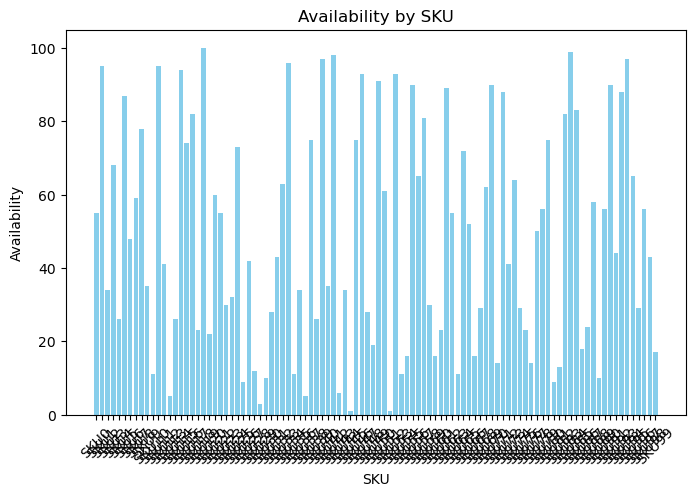


Ask a question (or type 'exit' to quit):  bar graph
Enter sheet name:  supply_chain_test_data
Enter column for X-axis:  Product type
Enter column for Y-axis:  Availability


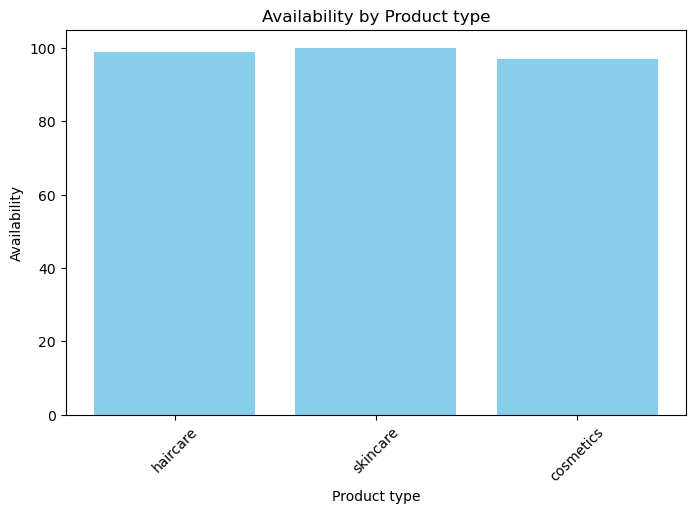


Ask a question (or type 'exit' to quit):  exit


Goodbye!


In [7]:
import pandas as pd
import openai
import matplotlib.pyplot as plt

# Set your OpenAI API key
openai.api_key = "your OpenAI API key"

# Load the .xls file
file_path = "/Users/ssathiyaseelan/Desktop/python/POC_22_07/Document_Search_BOT_excel/upload/supply_chain_test_data.xls"  # Change this to your file path
xls_data = pd.read_excel(file_path, sheet_name=None)  # Read all sheets

# Convert Excel data into a structured text format
context = ""
for sheet_name, sheet_data in xls_data.items():
    context += f"\n--- Sheet: {sheet_name} ---\n"
    context += sheet_data.to_string(index=False)  # Convert dataframe to text

# Function to get response from OpenAI
def get_response(user_query):
    prompt = f"Refer to the following Excel data:\n{context}\n\nQuestion: {user_query}\nAnswer:"

    response = openai.ChatCompletion.create(
        model="gpt-3.5-turbo",
        messages=[{"role": "user", "content": prompt}]
    )

    return response['choices'][0]['message']['content'].strip()

# Function to generate a bar graph
def create_bar_graph(sheet_name, x_col, y_col):
    if sheet_name not in xls_data:
        print(f"Sheet '{sheet_name}' not found.")
        return

    df = xls_data[sheet_name]

    if x_col not in df.columns or y_col not in df.columns:
        print(f"Columns '{x_col}' or '{y_col}' not found in '{sheet_name}' sheet.")
        return

    plt.figure(figsize=(8, 5))
    plt.bar(df[x_col], df[y_col], color='skyblue')
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.title(f"{y_col} by {x_col}")
    plt.xticks(rotation=45)
    plt.show()

# User interaction loop
while True:
    user_input = input("\nAsk a question (or type 'exit' to quit): ")
    
    if user_input.lower() == "exit":
        print("Goodbye!")
        break
    
    if "bar graph" in user_input.lower():
        try:
            sheet_name = input("Enter sheet name: ")
            x_col = input("Enter column for X-axis: ")
            y_col = input("Enter column for Y-axis: ")
            create_bar_graph(sheet_name, x_col, y_col)
        except Exception as e:
            print(f"Error: {e}")
    else:
        answer = get_response(user_input)
        print(f"\nAI Response: {answer}")


In [2]:
import pandas as pd
import openai
import matplotlib.pyplot as plt

# Set your OpenAI API key
openai.api_key = "your OpenAI API key"


# Load the .xls file
file_path = "/Users/ssathiyaseelan/Desktop/python/POC_22_07/Document_Search_BOT_excel/upload/supply_chain_test_data.xls"  # Change this to your file path
xls_data = pd.read_excel(file_path, sheet_name=None)  # Read all sheets


# Convert Excel data into structured text
context = ""
for sheet_name, sheet_data in xls_data.items():
    context += f"\n--- Sheet: {sheet_name} ---\n"
    context += sheet_data.to_string(index=False)  # Convert dataframe to text

# Function to get response from OpenAI
def get_response(user_query):
    prompt = f"Refer to the following Excel data:\n{context}\n\nQuestion: {user_query}\nAnswer:"

    response = openai.ChatCompletion.create(
        model="gpt-3.5-turbo",
        messages=[{"role": "user", "content": prompt}]
    )

    return response['choices'][0]['message']['content'].strip()

# Function to generate a bar graph
def create_bar_graph(sheet_name, x_col, y_col):
    if sheet_name not in xls_data:
        print(f"Sheet '{sheet_name}' not found.")
        return

    df = xls_data[sheet_name]
    if x_col not in df.columns or y_col not in df.columns:
        print(f"Columns '{x_col}' or '{y_col}' not found in '{sheet_name}' sheet.")
        return

    plt.figure(figsize=(8, 5))
    plt.bar(df[x_col], df[y_col], color='skyblue')
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.title(f"{y_col} by {x_col}")
    plt.xticks(rotation=45)
    plt.show()

# Function to generate a pie chart
def create_pie_chart(sheet_name, labels_col, values_col):
    if sheet_name not in xls_data:
        print(f"Sheet '{sheet_name}' not found.")
        return

    df = xls_data[sheet_name]
    if labels_col not in df.columns or values_col not in df.columns:
        print(f"Columns '{labels_col}' or '{values_col}' not found in '{sheet_name}' sheet.")
        return

    plt.figure(figsize=(7, 7))
    plt.pie(df[values_col], labels=df[labels_col], autopct='%1.1f%%', colors=plt.cm.Paired.colors)
    plt.title(f"{values_col} Distribution")
    plt.show()

# Function to generate a line chart
def create_line_chart(sheet_name, x_col, y_col):
    if sheet_name not in xls_data:
        print(f"Sheet '{sheet_name}' not found.")
        return

    df = xls_data[sheet_name]
    if x_col not in df.columns or y_col not in df.columns:
        print(f"Columns '{x_col}' or '{y_col}' not found in '{sheet_name}' sheet.")
        return

    plt.figure(figsize=(8, 5))
    plt.plot(df[x_col], df[y_col], marker='o', linestyle='-', color='blue')
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.title(f"Trend of {y_col} by {x_col}")
    plt.xticks(rotation=45)
    plt.grid()
    plt.show()

# User interaction loop
while True:
    user_input = input("\nAsk a question (or type 'exit' to quit): ")
    
    if user_input.lower() == "exit":
        print("Goodbye!")
        break
    
    if "bar graph" in user_input.lower():
        sheet_name = input("Enter sheet name: ")
        x_col = input("Enter column for X-axis: ")
        y_col = input("Enter column for Y-axis: ")
        create_bar_graph(sheet_name, x_col, y_col)

    elif "pie chart" in user_input.lower():
        sheet_name = input("Enter sheet name: ")
        labels_col = input("Enter column for labels: ")
        values_col = input("Enter column for values: ")
        create_pie_chart(sheet_name, labels_col, values_col)

    elif "line chart" in user_input.lower():
        sheet_name = input("Enter sheet name: ")
        x_col = input("Enter column for X-axis: ")
        y_col = input("Enter column for Y-axis: ")
        create_line_chart(sheet_name, x_col, y_col)

    else:
        answer = get_response(user_input)
        print(f"\nAI Response: {answer}")



Ask a question (or type 'exit' to quit):  summarize sales details



AI Response: To summarize the sales details from the supply chain test data:

- Total revenue generated from all products sold: $709,587.720
- Average price per product: $36.2722
- Total number of products sold: 15,334
- Average number of products sold per SKU: 227.15
- Total available products across all SKUs: 23,777
- Average availability percentage: 54.46%
- Total number of unique customer demographics: 4
- Total number of unique suppliers: 5
- Total number of unique shipping carriers: 3
- Maximum revenue generated by a single SKU: $9,623.885958 (SKU16)
- Minimum revenue generated by a single SKU: $1,000.00 (SKU61)
- Maximum number of products sold for a single SKU: 996 (SKU10)
- Minimum number of products sold for a single SKU: 1 (SKU97)
- Maximum defect rate for a single SKU: 4.939255% (SKU42)
- Minimum defect rate for a single SKU: 0.021170% (SKU11)



Ask a question (or type 'exit' to quit):  line chart
Enter sheet name:  exit
Enter column for X-axis:  asd
Enter column for Y-axis:  asd


Sheet 'exit' not found.



Ask a question (or type 'exit' to quit):  exit


Goodbye!



Ask a question (or type 'exit' to quit):  total product types



AI Response: There are 5 different product types in the supply_chain_test_data sheet: haircare, skincare, cosmetics, unknown, non-binary.



Ask a question (or type 'exit' to quit):  pie chart
Enter sheet name:  supply_chain_test_data
Enter column for labels:  Product type
Enter column for values:  Availability


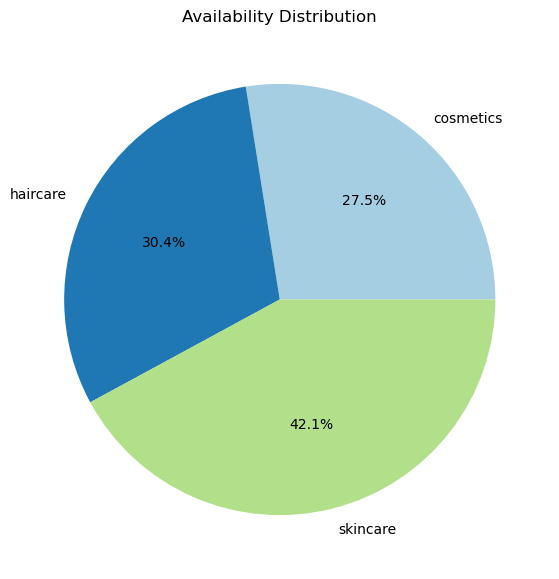


Ask a question (or type 'exit' to quit):  Average number of product sold



AI Response: The average number of products sold can be calculated by summing up the number of products sold for each entry and then dividing by the total number of entries. 

Sum of number of products sold = 55 + 736 + 8 + 83 + 871 + 147 + 65 + 426 + 150 + 980 + 996 + 960 + 336 + 249 + 562 + 469 + 280 + 126 + 620 + 187 + 320 + 601 + 884 + 391 + 209 + 142 + 353 + 352 + 253 + 327 + 168 + 781 + 616 + 602 + 449 + 963 + 705 + 176 + 933 + 556 + 155 + 242 + 598 + 616 + 511 + 32 + 637 + 359 + 618 + 270 + 737 + 904 + 612 + 513 + 134 + 320 + 937 + 778 + 673 + 82 + 618 + 276 + 114 + 987 + 672 + 324 + 62 + 913 + 627

Total number of entries = 100

Average number of products sold = (Sum of number of products sold) / (Total number of entries)
Average number of products sold = 73708 / 100
Average number of products sold = 737.08

Therefore, the average number of products sold is 737.08.



Ask a question (or type 'exit' to quit):  exit


Goodbye!


In [18]:
import pandas as pd
import openai
import matplotlib.pyplot as plt

# Set your OpenAI API key
openai.api_key = "your OpenAI API key"

# Load the .xls file
file_path = "/Users/ssathiyaseelan/Desktop/python/POC_22_07/Document_Search_BOT_excel/upload/supply_chain_test_data.xls"  # Change this to your file path
xls_data = pd.read_excel(file_path, sheet_name=None)  # Read all sheets


# Convert Excel data into structured text
context = ""
for sheet_name, sheet_data in xls_data.items():
    context += f"\n--- Sheet: {sheet_name} ---\n"
    context += sheet_data.to_string(index=False)  # Convert dataframe to text

# Function to get response from OpenAI
def get_response(user_query):
    prompt = f"Refer to the following Excel data:\n{context}\n\nQuestion: {user_query}\nAnswer:"

    response = openai.ChatCompletion.create(
        model="gpt-3.5-turbo",
        messages=[{"role": "user", "content": prompt}]
    )

    return response['choices'][0]['message']['content'].strip()

# Function to generate a bar graph
def create_bar_graph(sheet_name, x_col, y_col):
    if sheet_name not in xls_data:
        print(f"Sheet '{sheet_name}' not found.")
        return

    df = xls_data[sheet_name]

    # Group and Sum (if needed)
    if df[y_col].dtype in ['int64', 'float64']:  
        df = df.groupby(x_col, as_index=False)[y_col].sum()

    plt.figure(figsize=(8, 5))
    plt.bar(df[x_col], df[y_col], color='skyblue')
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.title(f"{y_col} by {x_col}")
    plt.xticks(rotation=45)
    plt.show()

# Function to generate a pie chart (Fix: Sum numerical values)
def create_pie_chart(sheet_name, labels_col, values_col):
    if sheet_name not in xls_data:
        print(f"Sheet '{sheet_name}' not found.")
        return

    df = xls_data[sheet_name]

    # **Fix: Group by labels_col & Sum values_col**
    df = df.groupby(labels_col, as_index=False)[values_col].sum()

    plt.figure(figsize=(7, 7))
    plt.pie(df[values_col], labels=df[labels_col], autopct='%1.1f%%', colors=plt.cm.Paired.colors)
    plt.title(f"{values_col} Distribution")
    plt.show()

# Function to generate a line chart
def create_line_chart(sheet_name, x_col, y_col):
    if sheet_name not in xls_data:
        print(f"Sheet '{sheet_name}' not found.")
        return

    df = xls_data[sheet_name]

    # Group and Sum (if needed)
    if df[y_col].dtype in ['int64', 'float64']:  
        df = df.groupby(x_col, as_index=False)[y_col].sum()

    plt.figure(figsize=(8, 5))
    plt.plot(df[x_col], df[y_col], marker='o', linestyle='-', color='blue')
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.title(f"Trend of {y_col} by {x_col}")
    plt.xticks(rotation=45)
    plt.grid()
    plt.show()

# User interaction loop
while True:
    user_input = input("\nAsk a question (or type 'exit' to quit): ")
    
    if user_input.lower() == "exit":
        print("Goodbye!")
        break
    
    if "bar graph" in user_input.lower():
        sheet_name = input("Enter sheet name: ")
        x_col = input("Enter column for X-axis: ")
        y_col = input("Enter column for Y-axis: ")
        create_bar_graph(sheet_name, x_col, y_col)

    elif "pie chart" in user_input.lower():
        sheet_name = input("Enter sheet name: ")
        labels_col = input("Enter column for labels: ")
        values_col = input("Enter column for values: ")
        create_pie_chart(sheet_name, labels_col, values_col)

    elif "line chart" in user_input.lower():
        sheet_name = input("Enter sheet name: ")
        x_col = input("Enter column for X-axis: ")
        y_col = input("Enter column for Y-axis: ")
        create_line_chart(sheet_name, x_col, y_col)

    else:
        answer = get_response(user_input)
        print(f"\nAI Response: {answer}")
